# Tugas 3 Machine Learning (Q-Learning)

Nama: Nopita Pratiwi Patmawati

Kelas: IF-39-05

NIM: 1301152636

Analisis Masalah:

Terdapat suatu gridworld yang telah berisikan reward untuk setiap langkahnya. metode yang harus digunakan adalah Q-Learning sehingga dapat menyelesaikan masalah dengan mempelajari enviromentnya dengan pemberian reward sehingga menemukan solusi tanpa adanya data latih dan data uji. dengan metode ini, diharapkan dapat menemukan optimum policy sehingga agent yang berada diposisi start(1,1) mampu menemukan goal yang berada diposisi (10,10). agent dapat melakukan 4 aksi yaitu: atas, bawah, kiri dan kanan.

Desain Sistem:
    
Sistem didesain dengan menggunakan algoritma Q-Learning yang terdapat pada slide pembelajaran Machine Learning
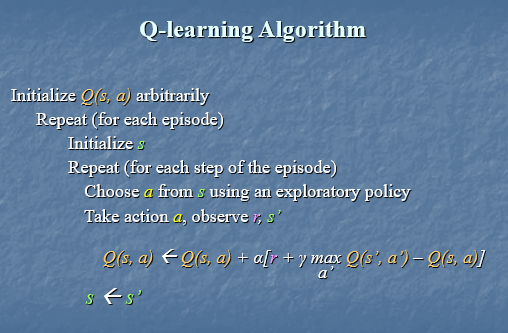

state yang digunakan adalah gridworldnya dan action yang digunakan adalah atas, bawah, kiri dan kanan dan didalam sistem dimisalkan dengan atas = 0, kanan = 1, bawah = 2, kiri = 3. episode yang digunakan didapatkan dari merandom nilai aksi. panjang episode adalah sepanjang agent dari start hingga ke goal tanpa ada batasan jumlah langkah yang harus diambil. apabila agent berjalan keluar dari gridworld maka akan dirandom kembali nilai aksi yang harus dilakukan sehingga agent berjalan di grid yang tepat. setelah mendapatkan keseluruhan nilai Qtabel, kemudian mencari nilai maksimal untuk diketahui langkah terbaik (optimum policy) yang harus diambil oleh agent. nilai maksimal tersebut dimasukkan kedalam tabel arah. setelah itu, tabel arah digunakan sebagai alat untuk mendapatkan total reward maksimum.

In [97]:
import numpy as np
import pandas as pd
import random

In [98]:
# membaca data grid world
reward = np.genfromtxt('DataTugasML3.txt', delimiter='\t')
reward

array([[ -1.,  -3.,  -5.,  -1.,  -3.,  -3.,  -5.,  -5.,  -1., 100.],
       [ -2.,  -1.,  -1.,  -4.,  -2.,  -5.,  -3.,  -5.,  -5.,  -5.],
       [ -3.,  -4.,  -4.,  -1.,  -3.,  -5.,  -5.,  -4.,  -3.,  -5.],
       [ -3.,  -5.,  -2.,  -5.,  -1.,  -4.,  -5.,  -1.,  -3.,  -4.],
       [ -4.,  -3.,  -3.,  -2.,  -1.,  -1.,  -1.,  -4.,  -3.,  -4.],
       [ -4.,  -2.,  -5.,  -2.,  -4.,  -5.,  -1.,  -2.,  -2.,  -4.],
       [ -4.,  -3.,  -2.,  -3.,  -1.,  -3.,  -4.,  -3.,  -1.,  -3.],
       [ -4.,  -2.,  -5.,  -4.,  -1.,  -4.,  -5.,  -5.,  -2.,  -4.],
       [ -2.,  -1.,  -1.,  -4.,  -1.,  -3.,  -5.,  -1.,  -4.,  -1.],
       [ -5.,  -3.,  -1.,  -2.,  -4.,  -3.,  -5.,  -2.,  -2.,  -2.]])

In [99]:
# 0 = atas, 1 = kanan, 2 = bawah, 3 = kiri
#row1 dan col1 sebagai currentstate, row2 dan col2 dijadikan nextstate
row1, col1, row2, col2=9,0,0,0
alfa,gamma = 0.9, 0.9 #menginisiasi nilai alfa dan gamma
Q = np.zeros((10,10,4))# membuat Qtable
def episode(act):# membuat episode berdasarkan actionnya
    if(act==0): #apabila aksi bergerak keatas
        row2, col2 = row1-1, col1
    if(act==1): #apabila aksi bergerak kekanan
        row2, col2 = row1, col1+1
    if(act==2): #apabila aksi bergerak keselatan
        row2, col2 = row1+1, col1
    if(act==3): #apabila aksi bergerak kekiri
        row2, col2 = row1, col1-1
    if((row2>9)|(row2<0)|(col2>9)|(col2<0)): #apabila aksi bergerak keluar gridworld
        act = random.randrange(4)
        row2,col2 = episode(act)
    return row2, col2

for i in range(60): # melakukan proses Learning dan looping sebanyak 60 episode
    while ((row1!=0) | (col1!=9)): #looping hingga currentstate mencapai goalstate
        act = random.randrange(4) #merandom aksi untuk dijadikan episode
        row2,col2 = episode(act)
        r=reward[row2,col2]+gamma*max(Q[row2,col2,:])-Q[row1,col1,act]
        Q[row1,col1, act] = Q[row1,col1,act]+alfa*(r)
        row1, col1 = row2, col2
    row1, col1, row2, col2=9,0,0,0

arah = np.zeros((10,10)) #menyimpan arah pergerakkan agent setelah proses learning
for x in range(10): #mencari nilai maksimal Qtabel untuk alur pergerakkan yang benar
    for y in range(10):
        arah[x,y]=np.argmax((Q[x,y,:]))
print(arah)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]]


In [100]:
akurasi = 0;
x,y=9,0
while ((x!=0) | (y!=9)): #mencari akurasi dari QLearning
    if(arah[x,y]==0):
        akurasi += reward[x-1,y];
#         print(reward[x-1,y])
        x=x-1
    if(arah[x,y]==1):
        akurasi += reward[x,y+1];
#         print(reward[x,y+1])
        y=y+1
    if(arah[x,y]==2):
        akurasi += reward[x+1,y];
#         print(reward[x+1,y])
        x=x+1
    if(arah[x,y]==3):
        akurasi += reward[x,y-1];
#         print(reward[x,y-1])
        y=y-1
#     print(akurasi)
#     print(' ')
print('Total reward atau Akurasi: ',akurasi)

Total reward atau Akurasi:  65.0


evaluasi hasil eksperimen:
    
nilai Qtabel didapatkan dari nilai observasi tiap langkah yang telah diambil. dari nilai Qtabel tersebut, dapat dicari untuk menentukan optimum policy (langkah terbaik) berdasarkan nilai maksimum tiap langkah. setelah mendapatkan optimum policynya maka dapat diperoleh total reward/akurasi yang maksimal.